# Question 2

1. Accuracy

Definition: Accuracy measures the proportion of true results (both true positives and true negatives) in the population.

Real-World Application:

Example: Predicting weather conditions (e.g., sunny vs. not sunny).

Rationale: In scenarios where the cost of false positives and false negatives is relatively equal, accuracy is an effective measure. For weather predictions, overall correctness is important for general reliability, and there is no extreme penalty for occasional errors.

2. Sensitivity

Definition: Sensitivity measures the proportion of actual positives that are correctly identified. Also known as "recall" or "true positive rate."

Real-World Application:

Example: Screening for a life-threatening disease (e.g., cancer).

Rationale: In medical diagnostics, missing actual cases of a disease (false negatives) can have severe consequences. Sensitivity ensures that most true cases are caught, even if it means some false positives.

3. Specificity

Definition: Specificity measures the proportion of actual negatives that are correctly identified. Also known as the "true negative rate."

Real-World Application:

Example: Screening for drug use in job applicants.

Rationale: In situations where falsely accusing someone of a condition (false positives) is worse than missing a few true positives, specificity is crucial. High specificity ensures that people who test positive are truly positive, minimizing unwarranted accusations.

4. Precision

Definition: Precision measures the proportion of positive identifications that were actually correct.

Real-World Application:

Example: Spam email detection systems.

Rationale: Precision is key in scenarios where false positives are highly undesirable. For spam filters, marking legitimate emails as spam (false positives) can cause user dissatisfaction. High precision ensures flagged emails are almost certainly spam.

ChatBot link: https://chatgpt.com/share/673f9371-6c98-8012-9913-9660ea649bfe

# Question 4

In [4]:
# Remove rows with NaN values
ab_reduced_noNaN = ab.dropna()

# Create an 80/20 split
ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(
    ab_reduced_noNaN, test_size=0.2, random_state=42
)

# Report the number of observations
print("Training set size:", len(ab_reduced_noNaN_train))
print("Testing set size:", len(ab_reduced_noNaN_test))


Training set size: 248
Testing set size: 62


In [5]:
# Target variable
y = pd.get_dummies(ab_reduced_noNaN_train["Hard_or_Paper"])['H']

# Feature variable
X = ab_reduced_noNaN_train[['List Price']]


In [6]:
# Initialize the Decision Tree Classifier
clf = tree.DecisionTreeClassifier(max_depth=2, random_state=42)

# Fit the model
clf.fit(X, y)


DecisionTreeClassifier(max_depth=2, random_state=42)

[Text(0.5, 0.8333333333333334, 'List Price <= 17.97\ngini = 0.363\nsamples = 248\nvalue = [189, 59]\nclass = Paperback'),
 Text(0.25, 0.5, 'List Price <= 10.8\ngini = 0.207\nsamples = 179\nvalue = [158, 21]\nclass = Paperback'),
 Text(0.125, 0.16666666666666666, 'gini = 0.375\nsamples = 44\nvalue = [33, 11]\nclass = Paperback'),
 Text(0.375, 0.16666666666666666, 'gini = 0.137\nsamples = 135\nvalue = [125, 10]\nclass = Paperback'),
 Text(0.75, 0.5, 'List Price <= 35.375\ngini = 0.495\nsamples = 69\nvalue = [31, 38]\nclass = Hardcover'),
 Text(0.625, 0.16666666666666666, 'gini = 0.452\nsamples = 58\nvalue = [20, 38]\nclass = Hardcover'),
 Text(0.875, 0.16666666666666666, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]\nclass = Paperback')]

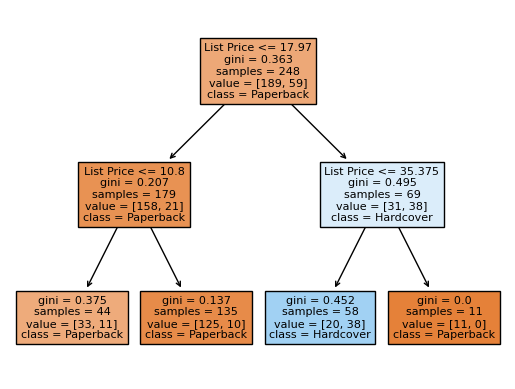

In [7]:
# Plot the tree
tree.plot_tree(clf, feature_names=["List Price"], class_names=["Paperback", "Hardcover"], filled=True)

The decision tree uses the "List Price" feature to create splits.

At each split, it decides a threshold (e.g., List Price < 20) that maximizes the separation between the classes (hardcover and paperback).

The tree will have a depth of 2, meaning there are at most 2 levels of decisions based on the "List Price."

ChatBot link: https://chatgpt.com/share/673f94df-c5e4-8012-abaa-b2d16821ca57

# Question 6

In [8]:
# Prepare test data
X_test = ab_reduced_noNaN_test[['List Price']]
y_test = pd.get_dummies(ab_reduced_noNaN_test["Hard_or_Paper"])['H']

# Predictions for clf and clf2
y_pred_clf = clf.predict(X_test)

# If clf2 exists, define it and predict with it
clf2 = tree.DecisionTreeClassifier(max_depth=3, random_state=42)  # Example clf2
clf2.fit(X, y)  # Training clf2 on training data
y_pred_clf2 = clf2.predict(X_test)

# Confusion matrices
cm_clf = confusion_matrix(y_test, y_pred_clf)
cm_clf2 = confusion_matrix(y_test, y_pred_clf2)

# Extract TP, TN, FP, FN for clf
tn_clf, fp_clf, fn_clf, tp_clf = cm_clf.ravel()
tn_clf2, fp_clf2, fn_clf2, tp_clf2 = cm_clf2.ravel()

# Metrics for clf
sensitivity_clf = np.round(tp_clf / (tp_clf + fn_clf), 3)
specificity_clf = np.round(tn_clf / (tn_clf + fp_clf), 3)
accuracy_clf = np.round((tp_clf + tn_clf) / cm_clf.sum(), 3)

# Metrics for clf2
sensitivity_clf2 = np.round(tp_clf2 / (tp_clf2 + fn_clf2), 3)
specificity_clf2 = np.round(tn_clf2 / (tn_clf2 + fp_clf2), 3)
accuracy_clf2 = np.round((tp_clf2 + tn_clf2) / cm_clf2.sum(), 3)

# Print results
print(f"Metrics for clf:\n Sensitivity: {sensitivity_clf}, Specificity: {specificity_clf}, Accuracy: {accuracy_clf}")
print(f"Metrics for clf2:\n Sensitivity: {sensitivity_clf2}, Specificity: {specificity_clf2}, Accuracy: {accuracy_clf2}")


Metrics for clf:
 Sensitivity: 0.895, Specificity: 0.907, Accuracy: 0.903
Metrics for clf2:
 Sensitivity: 0.737, Specificity: 0.93, Accuracy: 0.871


ChatBot link: https://chatgpt.com/share/673f94df-c5e4-8012-abaa-b2d16821ca57

# Question 7

The differences between the two confusion matrices arise from the input features used for prediction. The first confusion matrix is based on predictions using only the "List Price" variable, which may not fully capture the patterns or variations needed to differentiate between hardcover and paperback books. The second confusion matrix incorporates additional features like "NumPages" and "Thick," providing the model with more information, which could lead to improved predictions.

The confusion matrices for clf and clf2 (from Step 6) are better because they are evaluated on a test dataset, not the training dataset. Models evaluated on training data may show inflated performance due to overfitting, whereas those evaluated on unseen test data provide a more realistic assessment of the model's ability to generalize to new observations.

ChatBot link: https://chatgpt.com/share/673f94df-c5e4-8012-abaa-b2d16821ca57